In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import subprocess
import skimage
import skimage.io as imio
import skimage.transform as trans
from skimage.viewer import ImageViewer
import glob
from time import gmtime, strftime, sleep
import re
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 8.0) 

/Users/yeko/anaconda/lib/python3.6/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


## Test image capture and focus motor motion on a camera.

In [283]:
 def grabImage(sid=1, imres=8):
    # I will use the file name dbGrab.... for the image grabbed from the camera. First step is to get rid of previously grabbed images
#     subprocess.run('rm dbGrab*', \
#                    stdout=subprocess.PIPE, shell=True)
#     subprocess.run('ssh ubuntu@10.0.1.8 "rm dbGrab*"', \
#                    stdout=subprocess.PIPE, shell=True)
    # ok, now let's grab an image on the tegra
    cmD='ssh ubuntu@10.0.1.8 "nvgstcapture-1.0 -m 1 --sensor-id '+str(sid)+' -A --capture-auto 1 \
                    --file-name dbGrab --image-res '+ str(imres)+'"'
    subprocess.run(cmD, stdout=subprocess.PIPE, shell=True)
    subprocess.run('scp ubuntu@10.0.1.8:dbGrab* /Users/yeko/Dropbox/HW2/', \
                    stdout=subprocess.PIPE, shell=True)
    #ok, now let's find the file name of the image we just grabbed and transfered 
    pop=subprocess.run('ls',stdout=subprocess.PIPE, shell=True)
    rePop=pop.stdout
    rePop=rePop.decode("utf-8")
    fileName = re.search(r'dbGrab(.*).jpg', rePop)
    fileName=fileName.group()
    pop=imio.imread(fileName)
    pop=skimage.transform.rotate(pop,180)
    return pop

#p = grabImage(imres=3)
#imio.imshow(p)

In [4]:
def moveFocus(sid=1, step=1):
    cmD='ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py '+str(sid)+' '+str(step)+'"'
    pop=subprocess.run(cmD, stdout=subprocess.PIPE, shell=True)
    print(cmD)
    return pop.stdout

def resetFocus(sid=1):
    cmD='ssh ubuntu@10.0.1.8 "python2 ~/bin/resetFocusMotor.py '+str(sid)+'"'
    pop=subprocess.run(cmD, stdout=subprocess.PIPE, shell=True)
    return pop.stdout

## Test Laplacian and or other filters to evaluate the focus state of the camera. Make a plot of the value of your focus metric verses focus position. Confirm that the maximum of your focus metric occurs when the image visually appears to be infocus.


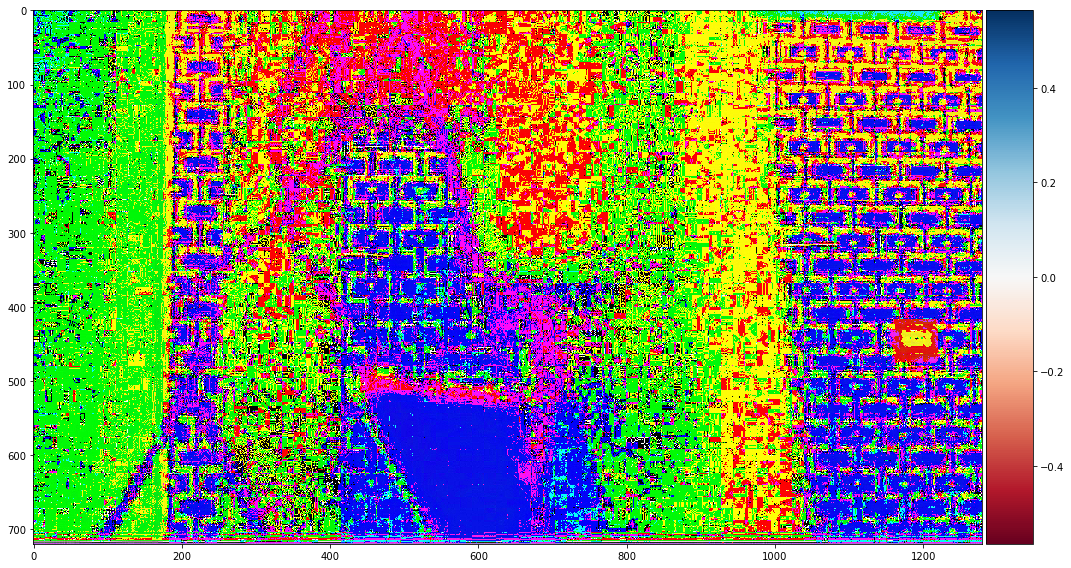

In [6]:

import scipy

pa = scipy.ndimage.filters.laplace(p, output=None, mode='reflect', cval=0.0)
imio.imshow(pa)


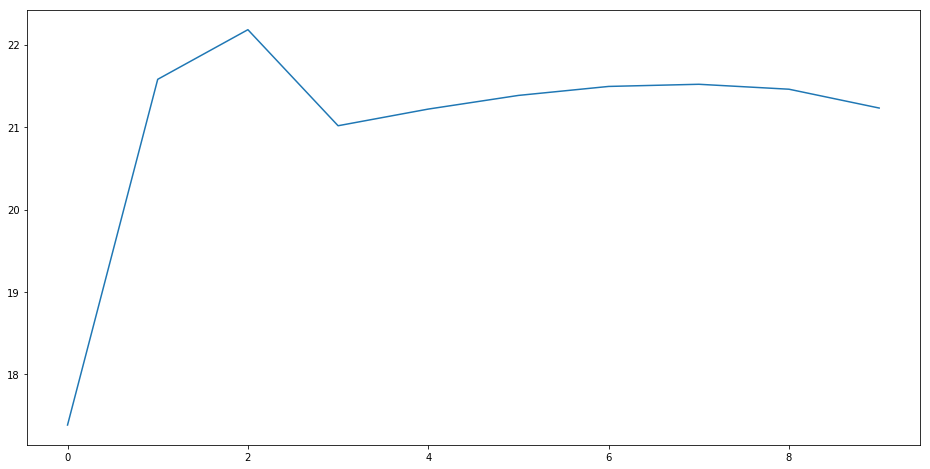

In [292]:
a=[17.386881524439495, 21.578718518187777, 22.180577333195789, 21.015888749516883, 21.21790115021145, 21.383603990843625, 21.492486296685552, 21.518688622108169, 21.458771144675083, 21.230506499817352]
plt.plot(a)

## autofocus the camera

In [11]:
import sys
sys.path.append('/usr/local/opt/opencv@3/lib/python3.6/site-packages')
import cv2

ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 -1000"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 -700"
[17.386881524439495, 21.578718518187777, 22.180577333195789, 21.015888749516883, 21.21790115021145, 21.383603990843625, 21.492486296685552, 21.518688622108169, 21.458771144675083, 21.230506499817352]


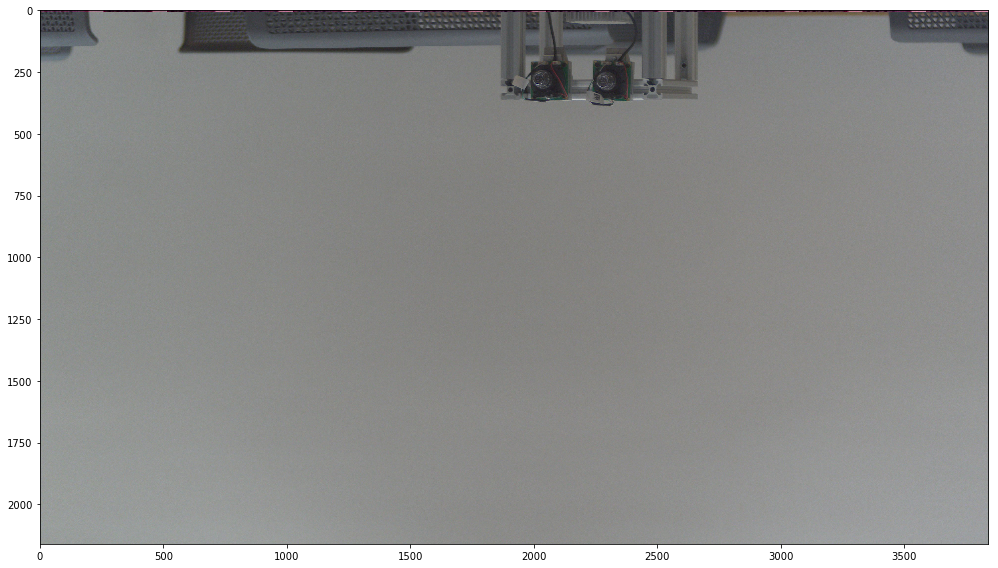

In [205]:
def autofocus(start=-1000,steps=100,block=10):
    resetFocus()
    moveFocus(step=start)
    #step=int((end-start)/block)
    for i in range(0,block):
        moveFocus(sid=1, step=steps)
        grabImage(sid=0)
    filenames=sorted((fn for fn in os.listdir('.') if fn.endswith('.jpg')))
    imageVars = list()
    for fn in filenames:
        image = cv2.imread(fn)
        imageVar = cv2.Laplacian(image, cv2.CV_64F).var()
        imageVars.append(imageVar)
    output_temp = max(imageVars)
    index=imageVars.index(max(imageVars))
    imio.imshow(filenames[index])
    moveFocus(sid=1, step=-(steps*(block-index-1)))

#     filenames=sorted((fn for fn in os.listdir('.') if fn.endswith('.jpg')))
#     # use loop to be More Precise 

#   subprocess.run('rm dbGrab*', \
#                     stdout=subprocess.PIPE, shell=True)
#   subprocess.run('ssh ubuntu@10.0.1.8 "rm dbGrab*"', \
#                     stdout=subprocess.PIPE, shell=True)
#     nstart = start+((index-1)*steps)
#     nend = start+((index+1)*steps)
#     block=5
#     steps= int((nend-nstart)/block)
#     autofocus(start=nstart,end=nend, steps=steps, block=block)
    
    return imageVars
        
print(autofocus())
    

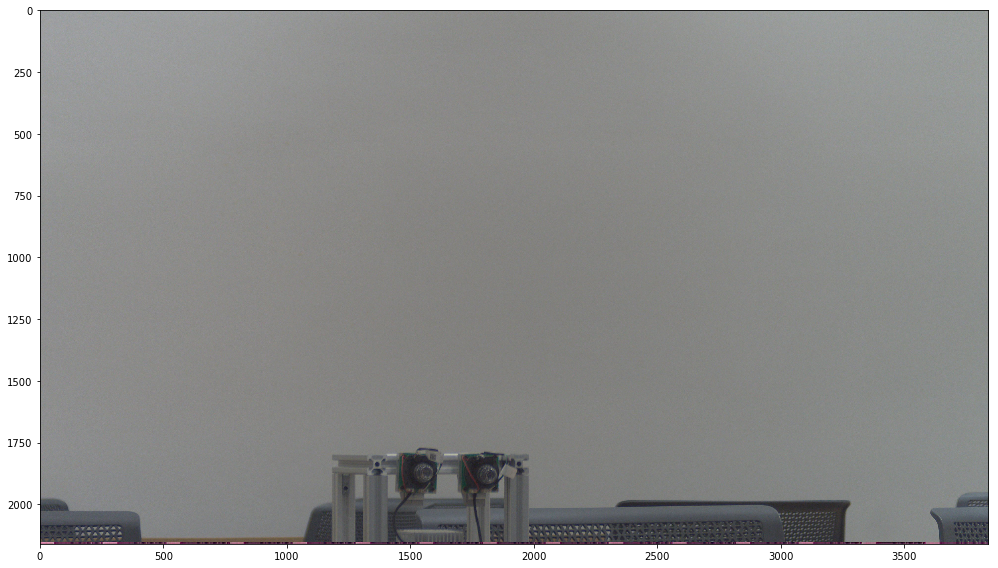

In [207]:
p = grabImage(sid=0)
imio.imshow(p)

## select a region of interest and focus just on that region.

ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 -1000"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 100"
ssh ubuntu@10.0.1.8 "python2 ~/bin/moveFocusMotor.py 1 -600"


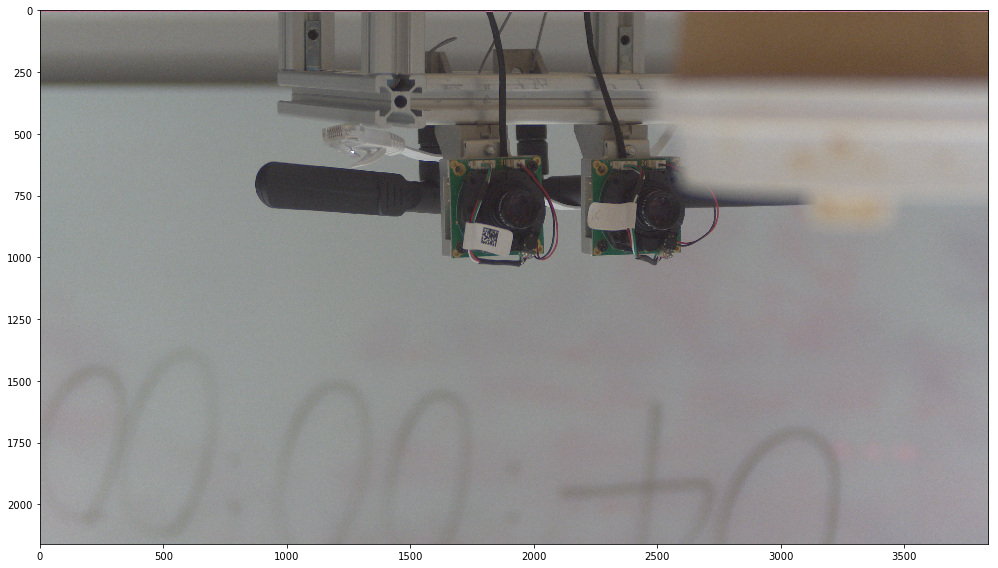

In [237]:
def region_autofocus(start=-1000,steps=100,block=10):
    resetFocus()
    moveFocus(step=start)
    #step=int((end-start)/block)
    for i in range(0,block):
        moveFocus(sid=1, step=steps)
        grabImage(sid=0)
    filenames=sorted((fn for fn in os.listdir('.') if fn.endswith('.jpg')))
    imageVars = list()
    for fn in filenames:
        image = cv2.imread(fn)
        image_slice = image[0:1000,1000:2500]
        imageVar = cv2.Laplacian(image_slice, cv2.CV_64F).var()
        imageVars.append(imageVar)
    output_temp = max(imageVars)
    index=imageVars.index(max(imageVars))
    imio.imshow(filenames[index])
    moveFocus(sid=1, step=-(steps*(block-index-1)))

region_autofocus()

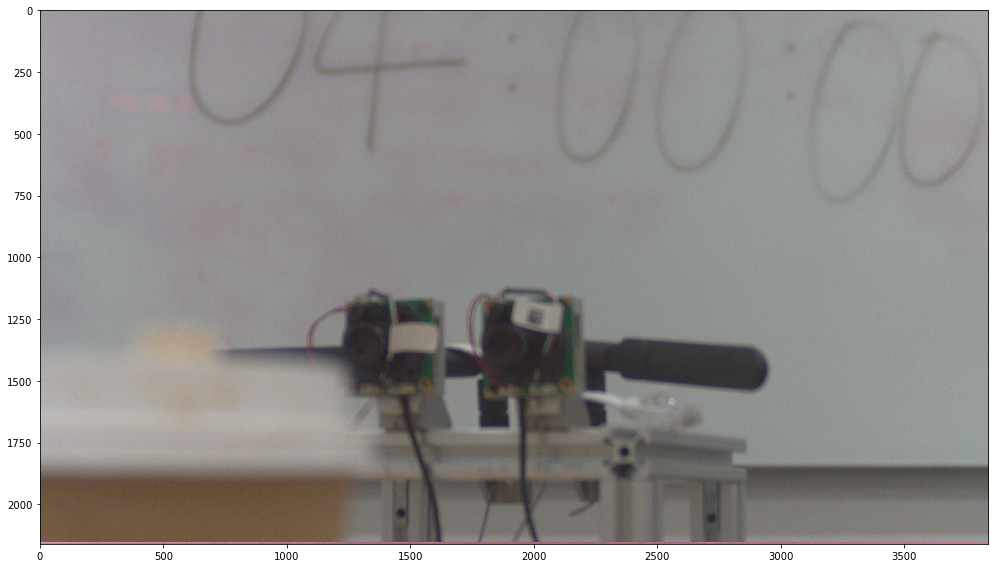

In [238]:
p = grabImage(sid=0)
imio.imshow(p)

## Each system includes 2 microcameras. Capture images of the same 3D scene with each camera autofocused at different ranges for different regions.

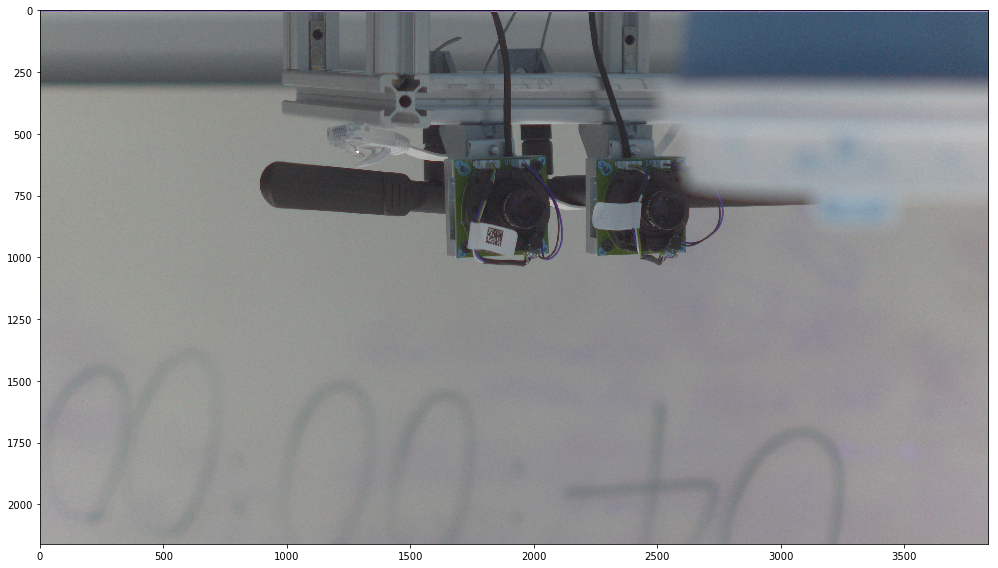

In [285]:
image = cv2.imread('dbGrab_4015_s00_00000.jpg')
imio.imshow(image)

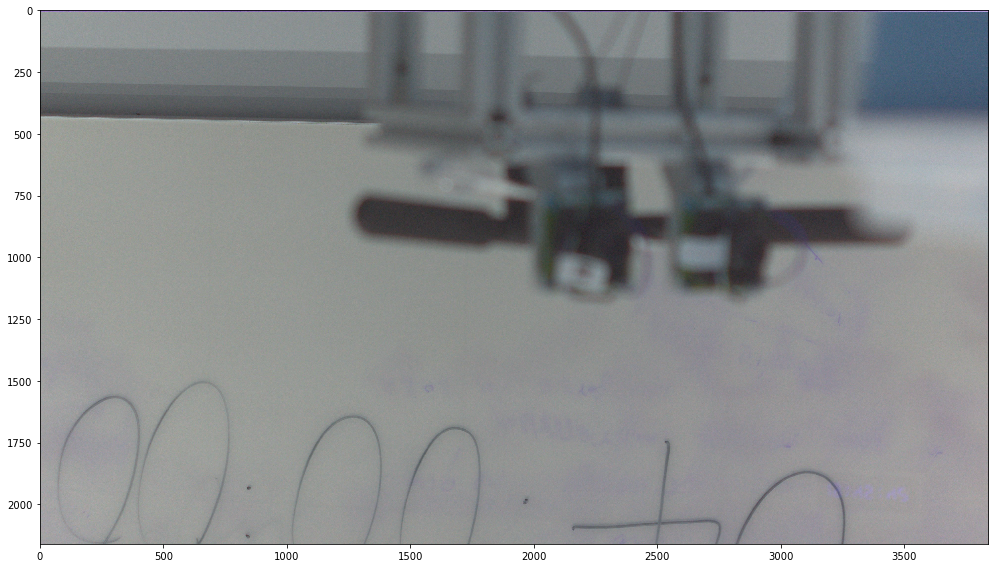

In [287]:
image = cv2.imread('dbGrab_6284_s01_00000.jpg')
imio.imshow(image)

## Extra credit: Can you find a way to combine the images from the two cameras into a single image. How does it look?